# AutoEncoders sur des Données Image

## Les Données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

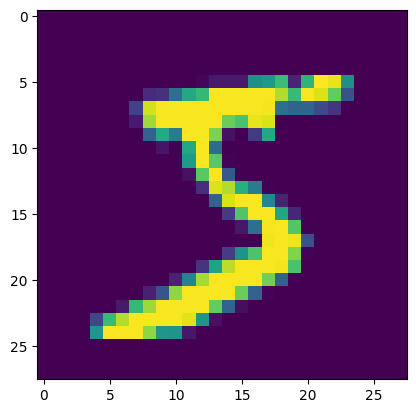

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

## Les Bases de l'AutoEncoder

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [16]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))
# on part de 784 et on arrive à 25 dimensions soit 3% de la taille initiale

In [17]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [18]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])

In [19]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2482 - accuracy: 0.0899 - val_loss: 0.2044 - val_accuracy: 0.1360
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1829 - accuracy: 0.1630 - val_loss: 0.1642 - val_accuracy: 0.1901
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1595 - accuracy: 0.1992 - val_loss: 0.1548 - val_accuracy: 0.2092
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1510 - accuracy: 0.2112 - val_loss: 0.1476 - val_accuracy: 0.2202
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1431 - accuracy: 0.2199 - val_loss: 0.1418 - val_accuracy: 0.2225


In [20]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 132ms/step


Image originale


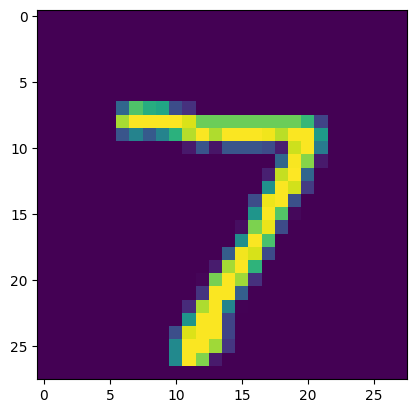

Tentative de reconstruction (après auto-encodeur)


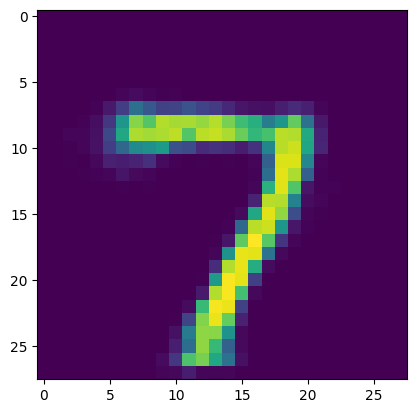

In [21]:
print("Image originale")
plt.imshow(X_test[0])
plt.show()
print("Tentative de reconstruction (après auto-encodeur)")
plt.imshow(passed_images[0])

# AutoEncoders pour le Débruitage des Images

In [22]:
from tensorflow.keras.layers import GaussianNoise

In [23]:
sample = GaussianNoise(0.2)

In [24]:
noisey = sample(X_test[0:2],training=True)

Sans bruit


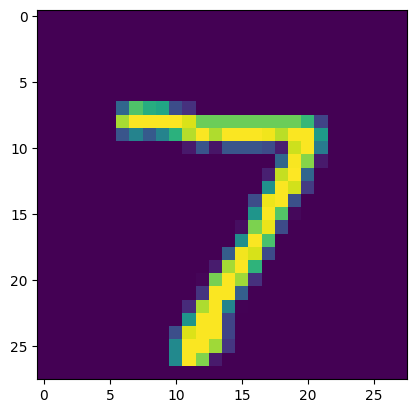

Avec bruit


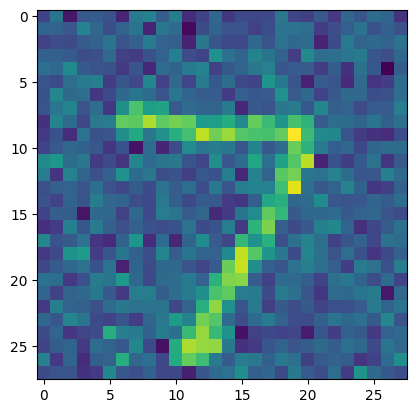

In [33]:
print("Sans bruit")
plt.imshow(X_test[0])
plt.show()
print("Avec bruit")
plt.imshow(noisey[0])

### Créer un auto-encodeur de suppression de bruit et l'entraîner

In [27]:
import tensorflow as tf

In [28]:
# Créer exactement le même bruit que la formation (facultatif)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Ajouter du bruit aux images avant de passer par l'auto-encodeur
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [29]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [30]:
noise_remover = Sequential([encoder, decoder])

In [31]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [32]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=(X_test, X_test))

Epoch 1/8
1875/1875 [==============================] - 18s 8ms/step - loss: 0.1758 - accuracy: 0.1733 - val_loss: 0.1397 - val_accuracy: 0.2228
Epoch 2/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1344 - accuracy: 0.2276 - val_loss: 0.1252 - val_accuracy: 0.2332
Epoch 3/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1238 - accuracy: 0.2415 - val_loss: 0.1173 - val_accuracy: 0.2457
Epoch 4/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1189 - accuracy: 0.2491 - val_loss: 0.1137 - val_accuracy: 0.2518
Epoch 5/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1150 - accuracy: 0.2540 - val_loss: 0.1097 - val_accuracy: 0.2612
Epoch 6/8
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1118 - accuracy: 0.2598 - val_loss: 0.1085 - val_accuracy: 0.2681
Epoch 7/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1098 - accuracy: 0.2651 - val_loss: 0.1069 - val_accura

In [ ]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

L'originale


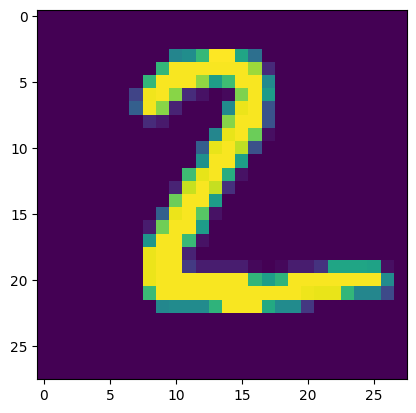

La version avec du bruit


NameError: name 'ten_noisey_images' is not defined

In [34]:
n = 1
print("L'originale")
plt.imshow(X_test[n])
plt.show()
print("La version avec du bruit")
plt.imshow(ten_noisey_images[n])
plt.show()
print("Après le Débruitage")
plt.imshow(denoised[n])
plt.show()